<a href="https://colab.research.google.com/github/Llmitless/AI_2s_1k/blob/main/Anisimov_i_Workbook7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Теоретический материал – Нейронные сети
Обучение персептрона
Персептрон представляет собой элементарную часть нейронной сети. 
Одиночный персептрон является линейным бинарным классификатором. В 
этой лекции мы рассмотрим процедуру обучения персептрона для 
классификации данных. Поскольку персептрон представляет собой 
бинарный классификатор, то мы будем рассматривать лишь два класса.
Пусть мы рассматриваем некоторое множество (конечное или 
бесконечное) n-мерных векторов, которые будем обозначать 𝑥 =
(𝑥1, 𝑥2, . . . , 𝑥𝑛)
Будем считать, что это множество разбивается на два класса, которые 
мы будем обозначать +1 и -1. Поэтому возникает задача построения 
функции, которая задана на нашем множестве векторов, и принимает 
значения в множестве {+1, −1}. В качестве такой функции может выступать 
персептрон. С алгебраической точки зрения персептрон состоит из вектора 
весов 𝑤 = (𝑤0, 𝑤1, 𝑤2, . . . , 𝑤𝑛).
При этом персептрон работает по формуле
𝑦 = 𝑠𝑖𝑔𝑛(𝑤0 + 𝑥1𝑤1 + 𝑥2𝑤2 + . . . + 𝑥𝑛𝑤𝑛),
где функция 𝑠𝑖𝑔𝑛(𝑡) равна +1, если 𝑡 ≥ 0, и равна −1, если 𝑡 < 0.
Приведем алгоритм обучения персептрона. Пусть у нас есть набор 
обучающих данных {(𝑥, 𝑑)}, где 𝑥 - это различные вектора, а 𝑑 из множества 
{+1, −1} указывает к какому классу относится наш вектор.
1. Положим вектор весов 𝑤 равным нулю.
2. Повторять 𝑁 раз следующие шаги:
3. Для каждого тестового набора (𝑥, 𝑑):
4. Вычислить 𝑦 = 𝑠𝑖𝑔𝑛[(𝑥, 𝑤)].
5. Если 𝑦𝑑 < 0, то скорректировать веса 𝑤0 = 𝑤0 + 𝑎𝑑, 𝑤𝑖 =
𝑤𝑖 + 𝑎𝑑𝑥𝑖
, 𝑖 = 1,2, . . . , 𝑛. 
Описанный алгоритм довольно легко программировать.

1.1.1 Пример
Задача:
Рассмотрим программу обучения персептрона на языке Python. Сначала 
рассмотрим основной класс персептрона, который умеет учиться по 
тестовым данным.

In [ ]:
class Perceptron:
  def __init__(self, N):
    self.w = list()
    for i in range(N):
      self.w.append(0)
  def calc(self, x):
    res = 0
    for i in range(len(self.w)):
      res += self.w[i]*x[i]
    return res
  def sign(self,x):
    if self.calc(x) > 0:
      return 1
    else:
      return -1
  def learn(self, la, x, y):
    if y * self.calc(x) > 0:
      return
    for i in range(len(self.w)):
      self.w[i] = self.w[i] + la * y * x[i]
  def learning(self,la,T):
    for n in range(100):
      for t in T:
        self.learn(la, t[0], t[1])

В строке 25 мы осуществляем корректировку весов. Посмотрим, как учится 
и работает наш персептрон.

In [ ]:
perc = Perceptron(2)
la = 0.1
T = [[2,1],1],[[3,2], 1],[[4,1], 1],[[1,2],-1],[[2,3], -1],[[5,7], -1]
T = list(T)
perc.learning(la, T)
print(perc.w)
print(perc.sign([1.5, 2]))
print(perc.sign([3, 1.5]))
print(perc.sign([5, 1]))
print(perc.sign([5, 10]))

[0.1, -0.1]
-1
1
1
-1


Теоретический материал – Реализация нейронной сети на Python
Нейронная сеть — это функциональная единица машинного или 
глубокого обучения. Она имитирует поведение человеческого мозга, 
поскольку основана на концепции биологических нейронных сетей.
Наиболее распространенный тип нейронной сети, называемый 
многослойным персептроном (MLP), представляет собой функцию, которая 
отображает входные данные в выходные данные. MLP имеет один входной
слой и один выходной слой. Между ними может быть один или несколько 
скрытых слоев. Входной слой имеет тот же набор нейронов, что и признаки. 
Скрытые слои также могут иметь более одного нейрона. Каждый нейрон 
представляет собой линейную функцию, к которой применяется функция 
активации для решения сложных задач. Выход каждого слоя подается в 
качестве входных данных для всех нейронов следующих слоев.
Нейронные сети способны решать множество задач. В основном они 
состоят из таких компонентов:
− входной слой (получение и передача данных);
− скрытый слой (вычисление);
− выходной слой. Чтобы реализовать нейросеть, необходимо 
понимать, как ведут себя нейроны. Нейрон одновременно 
принимает несколько входов, обрабатывает эти данные и выдает 
один выход. Нейронная сеть представляет собой блоки ввода и 
вывода, где каждое соединение имеет соответствующие веса (это 
сила связи нейронов; чем вес больше, тем один нейрон сильнее 
влияет на другой). Данные всех входов умножаются на веса:
− 𝑥 → 𝑥 ∗ 𝑤1;
− 𝑦 → 𝑦 ∗ 𝑤2.
Входы после взвешивания суммируются с прибавлением значения 
порога «c»:
𝑥𝑤1 + 𝑦𝑤2 + 𝑐
Полученное значение пропускается через функцию активации 
(сигмоиду), которая преобразует входы в один выход:
𝑧 = 𝑓(𝑥𝑤1 + 𝑦𝑤2 + 𝑐).
Так выглядит сигмоида:
Интервал результатов сигмоиды — от 0 до 1. Отрицательные числа 
стремятся к нулю, а положительные — к единице.
Например. Пусть нейрон имеет следующие значения: 𝑤 = [0,1] 𝑐 = 4.
Входной слой: 𝑥 = 2, 𝑦 = 3.
((𝑥𝑤1) + (𝑦𝑤2)) + 𝑐 = 20 + 31 + 4 = 7.
𝑧 = 𝑓(7) = 0.99.

1.1.2 Пример
Решение:
Для написания кода нейрона будем использовать библиотеку Pytnon
— NumPy:

In [ ]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias
  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0,1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9990889488055994


Нейросеть состоит из множества соединенных между собой нейронов.
Пример несложной нейронной сети где:
𝑥1, 𝑥2 — входной слой;
ℎ1, ℎ2 — скрытый слой с двумя нейронами;
𝑜1 — выходной слой.
Например. Представим, что нейроны из графика выше имеют веса
[0, 1]. Пороговое значение (𝑏) у обоих нейронов равно 0 и они имеют
идентичную сигмоиду.
При входных данных 𝑥 = [2, 3] получим:
ℎ1 = ℎ2 = 𝑓(𝑤𝑥 + 𝑏) = 𝑓((02) + (1 ∗ 3) + 0) = 𝑓(3) = 0.95.
𝑜1 = 𝑓(𝑤 ∗ [ℎ1, ℎ2] + 𝑏) = 𝑓((0ℎ1) + (1ℎ2) + 0) = 𝑓(0.95) = 0.72.
Входные данные по нейронам передаются до тех пор, пока не 
получатся выходные значения.

In [ ]:
import numpy as np
class ONN:
  def __init__(self):
    weights = np.array([0,1])
    bias = 0
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)
  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
    return out_o1

network = ONN()
x = np.array([2,3])
print(network.feedforward(x))

0.7216325609518421


Теоретический материал – Обучение нейронной сети
Обучение нейросети — это подбор весов, которые соответствуют всем 
входам для решения поставленных задач.
Класс нейронной сети:

In [ ]:
def sigmoid_derivative(x):
  f = sigmoid(x)
  return f * (1 - f)

class NN:
  def __init__(self, x, y):
    self.input = x
    self.weights1 = np.random.rand(self.input.shape[1], 4)
    self.weights2 = np.random.rand(4, 1)
    self.y = y
    self.output = np.zeros(self.y.shape)

  def feedforward(self, x):
    self.layer1 = sigmoid(np.dot(self.input, self.weights1))
    self.output = sigmoid(np.dot(self.layer1, self.weights2))

  def backprob(self):
    d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
    d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output)*sigmoid_derivative(self.output),
                                              self.weights2.T)*sigmoid_derivative(self.layer1)))
    self.weights1 += d_weights1
    self.weights2 += d_weights2

In [ ]:
import numpy as np
class ONNz1:
  def __init__(self):
    weights = np.array([0.5,0.5,0.5])
    bias = 0
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.h3 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)
  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)
    out_h3 = self.h3.feedforward(x)
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
    return out_o1
class ONNz2:
  def __init__(self):
    weights = np.array([1,0])
    bias = 1
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)
    self.o2 = Neuron(weights, bias)
  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)
    out_o1 = self.o1.feedforward(np.array(out_h1))
    out_o2 = self.o1.feedforward(np.array(out_h2))
    return out_o1, out_o2

network = ONNz1()
x = np.array([2,3,4])
print(network.feedforward(x))

network = ONNz2()
x = np.array([2,3])
out = network.feedforward(x)
print(out[0], out[1])

0.8151036049051821
[0.87572705 0.73105858] [0.87572705 0.73105858]


Задание:
Реализуйте классы нейронных сетей с использованием других функций 
активации.

In [ ]:

def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def tanh_derivative(x):
  return 1 - x**2

def ReLU(x):
  return max(0, x)

def ReLU_derivative(x):
  return (x > 0) * 1

class NN1:
  def __init__(self, x, y):
    self.input = x
    self.weights1 = np.random.rand(self.input.shape[1], 4)
    self.weights2 = np.random.rand(4, 1)
    self.y = y
    self.output = np.zeros(self.y.shape)

  def feedforward(self, x):
    self.layer1 = tanh(np.dot(self.input, self.weights1))
    self.output = tanh(np.dot(self.layer1, self.weights2))

  def backprob(self):
    d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * tanh_derivative(self.output)))
    d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output)*tanh_derivative(self.output),
                                              self.weights2.T)*tanh_derivative(self.layer1)))
    self.weights1 += d_weights1
    self.weights2 += d_weights2

class NN2:
  def __init__(self, x, y):
    self.input = x
    self.weights1 = np.random.rand(self.input.shape[1], 4)
    self.weights2 = np.random.rand(4, 1)
    self.y = y
    self.output = np.zeros(self.y.shape)

  def feedforward(self, x):
    self.layer1 = ReLU(np.dot(self.input, self.weights1))
    self.output = ReLU(np.dot(self.layer1, self.weights2))

  def backprob(self):
    d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * ReLU_derivative(self.output)))
    d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output)*ReLU_derivative(self.output),
                                              self.weights2.T)*ReLU_derivative(self.layer1)))
    self.weights1 += d_weights1
    self.weights2 += d_weights2


1.2. Введение в нейронные сети с помощью Scikit-Learn в Python
Теперь мы знаем, что такое нейронные сети и какие шаги необходимо 
выполнить, чтобы построить простую нейронную сеть с плотными связями. 
В этом разделе мы попытаемся построить простую нейронную сеть, которая 
предсказывает класс, к которому принадлежит данное растение ириса. Мы 
будем использовать библиотеку Python Scikit-Learn для создания нашей 
нейронной сети.
Sklearn предоставляет 2 оценщика для задач классификации и 
регрессии соответственно:
− MLPClassifier;
− MLPRegressor 
Начнем с импорта необходимых библиотек.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

MLPClassifier
Загрузка данных
Мы будем загружать два набора данных.
Набор данных цифр: мы будем использовать набор данных цифр, 
который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем 
использовать цифровые данные для задач классификации.
Набор данных о жилье в Бостоне: мы будем использовать набор 
данных о жилье в Бостоне, который содержит информацию о различных 
свойствах дома, таких как среднее количество комнат, уровень преступности 
на душу населения в городе и т. д. Мы будем использовать его для задач 
регрессии.
Sklearn предоставляет оба этих набора данных. Мы можем загрузить 
их, вызвав методы load_digits() и load_boston().


In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Size: ', X_digits.shape, Y_digits.shape)

Классификация
MLPClassifier — это клвсс, доступный как часть модуля neuro_network 
sklearn для выполнения задач классификации с использованием 
многослойного персептрона.
Как обычно разделим набор данных на две части:
− данные обучения, которые будут использоваться для модели 
обучения;
− тестовые данные, по которым будет проверяться точность 
обученной модели.
Функция train_test_split модуля model_selection sklearn поможет нам 
разделить данные на два набора: 80% для обучения и 20% для тестирования. 
Мы также используем seed(random_state=123) с train_test_split, чтобы мы 
всегда получали одно и то же разделение и могли сравнивать и 
воспроизволить результаты в будущем.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123)
print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Для начала натренируем модель MLPClassifier с параметрами по умолчанию 
для тренировочных данных.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

In [ ]:
Y_preds = mlp_classifier.predict(X_test)
print(Y_preds[:15])
print(Y_test[:15])
print('Test Accuracy: %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy: %.3f'%mlp_classifier.score(X_train, Y_train))


[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy: 0.983
Training Accuracy: 1.000


Cоздадим метод plot_confusion_matrix(), который принимает исходные и 
предсказанные метки данных по модели. Затем он строит матрицу путаницы, 
используя matplotlib.

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confussion_matrix(Y_test, Y_preds):
  conf_mat = confusion_matrix(Y_test, Y_preds)
  fig = plt.figure(figsize=(6,6))
  plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
  plt.yticks(range(10),range(10))
  plt.xticks(range(10),range(10))
  plt.colorbar()
  for i in range(10):
    for j in range(10):
      plt.text(i-0.2, j+0.1, str(conf_mat[j,i]), color='tab:red')

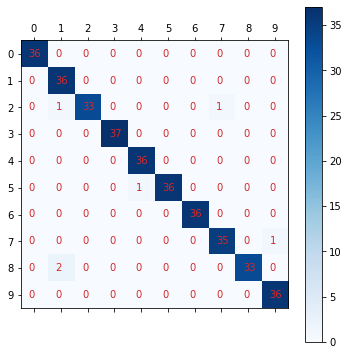

In [ ]:
plot_confussion_matrix(Y_test, mlp_classifier.predict(X_test))

Ниже приведен список важных атрибутов, доступных с MLPClassifier, 
которые могут предоставить значимую информацию после обучения 
модели.
− loss_ — возвращает убыток после завершения процесса обучения.
− coefs_ — возвращает массив длины n_layers-1, где каждый элемент 
представляет веса, связанные с уровнем i.
− intercepts_ — возвращает массив длины n_layers-1, где каждый 
элемент представляет собой перехват, связанный с персептронами 
слоя i.
− n_iter_ — количество итераций, для которых выполнялась оценка.
− out_activation_ — возвращает имя функции активации выходного 
слоя.

In [ ]:
print('Loss:', mlp_classifier.loss_)
print('Number of Coefs:', len(mlp_classifier.coefs_))
print('Number of Intercepts:', len(mlp_classifier.intercepts_))
print('Number of Iterations for Which Estimator Ran:', mlp_classifier.n_iter_)
print('Number of Output Layer Activation Function:', mlp_classifier.out_activation_)

Loss: 0.0034728684994180608
Number of Coefs: 2
Number of Intercepts: 2
Number of Iterations for Which Estimator Ran: 125
Number of Output Layer Activation Function: softmax


MLPRegressor
MLPRegressor — это класс, доступный как часть библиотеки 
neuro_network sklearn для выполнения задач регрессии с использованием 
многослойного персептрона. Также разделим набор данных на две части:
− данные обучения (80%), которые будут использоваться для 
модели обучения;
− тестовые данные (20%), по которым будет проверяться точность 
обученной модели.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(random_state=123)
mlp_reg.fit(X_train,Y_train)

Train/Test Sizes:  (404, 13) (102, 13) (404,) (102,)


MLPRegressor(random_state=123)

In [ ]:
Y_preds = mlp_reg.predict(X_test)
print(Y_preds[:10])
print(Y_test[:10])
print('Test Accuracy: %.3f'%mlp_reg.score(X_test, Y_test))
print('Training Accuracy: %.3f'%mlp_reg.score(X_train, Y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test Accuracy: 0.462
Training Accuracy: 0.510


In [ ]:
print('Loss:', mlp_reg.loss_)
print('Number of Iterations for Which Estimator Ran:', mlp_reg.n_iter_)
print('Number of Output Layer Activation Function:', mlp_reg.out_activation_)
print('Number of Coefs:', len(mlp_reg.coefs_))
[weights.shape for weights in mlp_reg.coefs_]

Loss: 28.538174061119584
Number of Iterations for Which Estimator Ran: 130
Number of Output Layer Activation Function: identity
Number of Coefs: 2


[(13, 100), (100, 1)]

Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.
Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv

In [ ]:
data_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
dataset = pd.read_csv(data_url)
X_train, X_test, Y_train, Y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, -1], train_size=0.80, test_size=0.20, stratify=dataset.iloc[:, -1], random_state=123)
mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)
Y_preds = mlp_classifier.predict(X_test)
print(Y_preds[:5])
print(Y_test[:5])
print('Test Accuracy: %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy: %.3f'%mlp_classifier.score(X_train, Y_train))

print('Loss:', mlp_classifier.loss_)
print('Number of Coefs:', len(mlp_classifier.coefs_))
print('Number of Intercepts:', len(mlp_classifier.intercepts_))
print('Number of Iterations for Which Estimator Ran:', mlp_classifier.n_iter_)
print('Number of Output Layer Activation Function:', mlp_classifier.out_activation_)

['Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Setosa']
80     Versicolor
45         Setosa
144     Virginica
110     Virginica
38         Setosa
Name: variety, dtype: object
Test Accuracy: 0.933
Training Accuracy: 0.983
Loss: 0.29887893401974336
Number of Coefs: 2
Number of Intercepts: 2
Number of Iterations for Which Estimator Ran: 200
Number of Output Layer Activation Function: softmax


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
data_url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
dataset = pd.read_csv(data_url)
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, 0], train_size=0.80, test_size=0.20, random_state=123)

print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes:  (24, 1) (6, 1) (24,) (6,)


In [ ]:
mlp_reg = MLPRegressor(random_state=123)
mlp_reg.fit(X_train,Y_train)

Y_preds = mlp_reg.predict(X_test)
print(Y_preds[:10])
print(Y_test[:10])
print('Test Accuracy: %.3f'%mlp_reg.score(X_test, Y_test))
print('Training Accuracy: %.3f'%mlp_reg.score(X_train, Y_train))

print('Loss:', mlp_reg.loss_)
print('Number of Iterations for Which Estimator Ran:', mlp_reg.n_iter_)
print('Number of Output Layer Activation Function:', mlp_reg.out_activation_)
print('Number of Coefs:', len(mlp_reg.coefs_))
[weights.shape for weights in mlp_reg.coefs_]

[ 3.31051161 10.13826574  3.02191336  9.25039488  3.31051161  9.33918197]
7      3.2
29    10.5
5      2.9
26     9.5
8      3.2
27     9.6
Name: YearsExperience, dtype: float64
Test Accuracy: 0.996
Training Accuracy: 0.997
Loss: 0.008698047282581502
Number of Iterations for Which Estimator Ran: 200
Number of Output Layer Activation Function: identity
Number of Coefs: 2


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[(1, 100), (100, 1)]